In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dataframe_image as dfi
from datetime import datetime
import networkx as nx
import scipy
import itertools
from scipy.stats import linregress

In [16]:
file = r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\Untitled Folder\reg_TA_PA.csv"
df = pd.read_csv(file)

In [17]:
pd.set_option('display.max_columns', None)
df

,time_x,admin1,conflicts,TA,PA
0,1997-02-15,Awdal,0.0,NaN,NaN
1,1997-03-16,Awdal,0.0,NaN,NaN
2,1997-04-16,Awdal,0.0,0.001765,0.154799
3,1997-05-16,Awdal,0.0,-0.130148,-0.188138
4,1997-06-16,Awdal,0.0,0.364936,-0.098494
...,...,...,...,...,...
2785,2009-08-16,Woqooyi Galbeed,7.0,0.067584,-0.357772
2786,2009-09-16,Woqooyi Galbeed,4.0,0.335509,0.137361
2787,2009-10-16,Woqooyi Galbeed,1.0,0.047064,-0.164798
2788,2009-11-16,Woqooyi Galbeed,0.0,NaN,NaN


In [18]:
reg=[]
for admin in df['admin1'].unique():
    a = df[df['admin1']==admin].reset_index(drop=True)
    reg.append(a)

In [27]:
# Plot the data
#f, ax = plt.subplots(figsize=(12, 4))
#reg[2]['TA'].plot.line(      #marker="o",
                              #ax=ax,
                              #color="grey",
                              #markerfacecolor="purple",
                              #markeredgecolor="purple")
#ax.set(title="Annual Max Temperature in %s" %reg[2]['admin1'].unique()[0])
#plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))
reg[2]['conflicts'].plot.line(marker="o",
                              ax=ax,
                              color="k",
                              markerfacecolor="r",
                              markeredgecolor="purple")
plt.show()

In [6]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
                marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    

Estimated coefficients:
b_0 = 33.81170823591354 
b_1 = 11.358779853029823


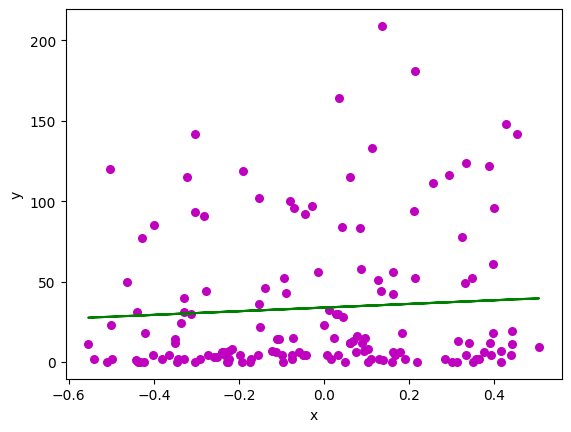

In [22]:
start_month=6
shift=-4
window_size=148

r=2
x = reg[r]['TA'][start_month + shift : start_month + shift + window_size]
y = reg[r]['conflicts'][start_month : start_month + window_size]

# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {} \
\nb_1 = {}".format(b[0], b[1]))

slope, intercept, r_value, p_value, std_err = linregress(x, y)

z = slope * x + intercept

plot_regression_line(x, y, b)

plt.show()

Estimated coefficients:
b_0 = 33.30559887436889 
b_1 = -7.136430516240445


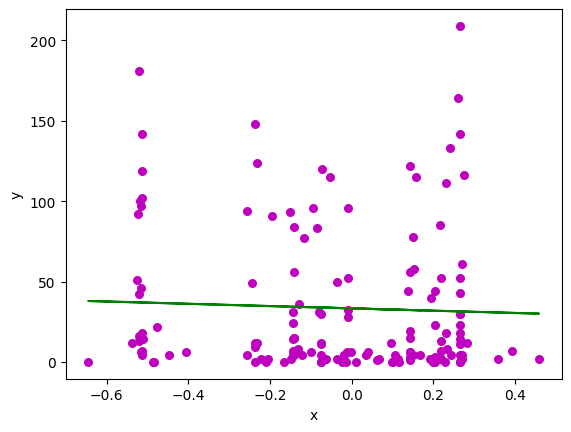

In [24]:
r=2
x = reg[r]['PA'][start_month + shift : start_month + shift + window_size]
y = reg[r]['conflicts'][start_month : start_month + window_size]

# estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {} \
\nb_1 = {}".format(b[0], b[1]))

slope, intercept, r_value, p_value, std_err = linregress(x, y)

z = slope * x + intercept

plot_regression_line(x, y, b)

plt.show()

#print(1 - (1-regr.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

In [ ]:
file = r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\Untitled Folder\temp-prec-conf.csv"
df = pd.read_csv(file)
reg=[]
for admin in df['admin1'].unique():
    a = df[df['admin1']==admin].reset_index(drop=True)
    reg.append(a)

In [ ]:
# Assuming you have a list of vector pairs
slopes=[]
rvalues=[]

vector_pairs = [(reg[i]['tmx'],reg[i]['conflicts']) for i in range(18)]

# Define the window size for analysis
window_size = 150

# Initialize variables to store the best shift and maximum average coefficient
shift = 3
max_average_coefficient = -np.inf

for vector1, vector2 in vector_pairs:
    sliced_vector1 = vector1[0: window_size ]
    sliced_vector2 = vector2[shift:shift + window_size]

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(sliced_vector1, sliced_vector2)
    
    slopes.append(slope)
    rvalues.append(r_value)
    
    print(slope)
    
np.mean(slopes)

In [ ]:
file1 = r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\Untitled Folder\temp-conf.csv"
file2 = r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\Untitled Folder\prec-conf.csv"

df = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df2= df2.drop(['conflicts','time_y'], axis=1)
merged_df = pd.merge(df, df2, on=['time_x','admin1'], how='outer')
pd.set_option('display.max_columns', None)
merged_df= merged_df[['time_x', 'admin1', 'conflicts','time_y','tmx','pre']]
#merged_df.to_csv('temp-prec-conf.csv', index=False)

In [ ]:
# Plot the data
f, ax = plt.subplots(figsize=(12, 4))
reg[2]['pre'].plot.line(      #marker="o",
                              ax=ax,
                              color="grey",
                              markerfacecolor="purple",
                              markeredgecolor="purple")
reg[2]['conflicts'].plot.line(#marker="o",
                              ax=ax,
                              color="k",
                              markerfacecolor="r",
                              markeredgecolor="purple")
reg[2]['tmx'].plot.line(      ax=ax,
                              color="k",
                              markerfacecolor="b")
ax.set(title="Annual in %s" %reg[2]['admin1'].unique()[0])
plt.show()